### Supervised Learning - Classification Models

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the directory where models will be saved
models_dir = r"C:\Users\menah\Downloads\Heart_Disease_Project\data"

model_path = os.path.join(models_dir, 'X_train_pca.csv')
X_train= pd.read_csv(model_path)

model_path = os.path.join(models_dir, 'X_test_pca.csv')
X_test=pd.read_csv(model_path) 

model_path = os.path.join(models_dir, 'heart_disease_target_test.csv')
y_test=pd.read_csv(model_path) 

model_path = os.path.join(models_dir, 'heart_disease_target_train.csv')
y_train=pd.read_csv(model_path)

In [13]:
from sklearn.metrics import accuracy_score , precision_score ,recall_score ,f1_score ,roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [14]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42 , class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42 ,class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42 ,class_weight='balanced'),
    "SVM": SVC(probability=True, random_state=42 , class_weight='balanced')
}
results = []
roc_curves = {}

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

results = []

for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    if y_prob is not None:
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = None

    results.append([name, acc, prec, rec, f1, auc])

# Results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC"])
results_df = results_df.sort_values(by="AUC", ascending=False).round(3)

print(results_df)



c:\Users\menah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\menah\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                 Model  Accuracy  Precision  Recall  F1-score    AUC
2        Random Forest     0.883      0.840   0.875     0.857  0.936
3                  SVM     0.900      0.846   0.917     0.880  0.925
0  Logistic Regression     0.867      0.864   0.792     0.826  0.917
1        Decision Tree     0.700      0.615   0.667     0.640  0.694


c:\Users\menah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# Save DataFrame to txt (tabular text)
with open(r"C:\Users\menah\Downloads\Heart_Disease_Project\results\evaluation_metrics.txt", "a") as f:
    f.write(results_df.to_string(index=False))


In [16]:
from sklearn.metrics import roc_curve

roc_curves = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # prob for class 1
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_curves[name] = (fpr, tpr)




c:\Users\menah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\menah\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\menah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


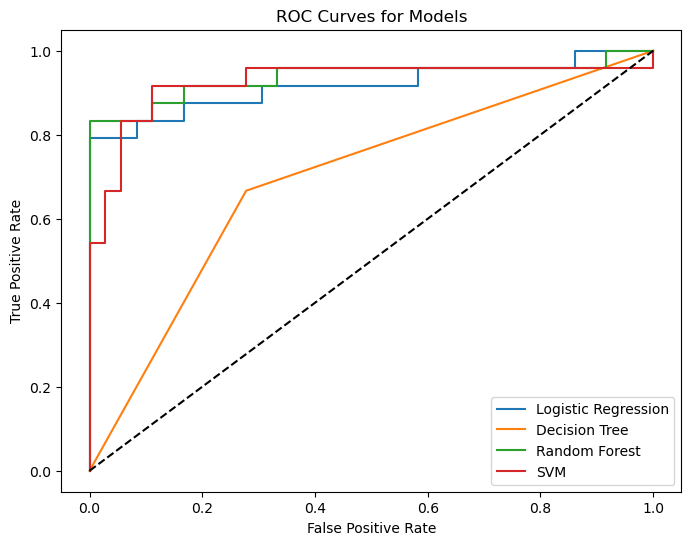

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models")
plt.legend()
plt.show()



In [18]:
import joblib
import os

# Define the directory where models will be saved
models_dir = r"C:\Users\menah\Downloads\Heart_Disease_Project\models"
os.makedirs(models_dir, exist_ok=True)  # Create directory if it doesn't exist

# Save each model in the dictionary
for name, model in models.items():
    model_path = os.path.join(models_dir, f"{name.replace(' ', '_')}.joblib")
    joblib.dump(model, model_path)
    print(f"Saved {name} to {model_path}")

Saved Logistic Regression to C:\Users\menah\Downloads\Heart_Disease_Project\models\Logistic_Regression.joblib
Saved Decision Tree to C:\Users\menah\Downloads\Heart_Disease_Project\models\Decision_Tree.joblib
Saved Random Forest to C:\Users\menah\Downloads\Heart_Disease_Project\models\Random_Forest.joblib
Saved SVM to C:\Users\menah\Downloads\Heart_Disease_Project\models\SVM.joblib
